<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise4_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=1000)
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True,
memory='nilearn_cache')
input_variables =masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F',
dtype=int) #gives 1 for females and 0 for males

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


In [ ]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [ ]:
X, y = input_variables, output_variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
coefs = []

In [ ]:
n_iterations = 100
for i in range(n_iterations):
    X_train = resample(X_train, replace=True, n_samples=80) # X_train is the given bootstrap sample in the current iteration
    X_train = scaler.fit_transform(X_train) # Here we run the scaler on every iteration
    LR_boot = LogisticRegression(max_iter=1e5, penalty = 'l1', C = 1, solver = 'saga').fit(X_train,y_train) # We fit the LR model to the current bootstrap sample  
    coefs.append(LR_boot.coef_) # Store the coefficients in the "coefficients" array

In [ ]:
models = list(range(0,100))
len(models)
l_zeroes = []

# Let's count the number of zeroed out input variables in each bootstrap sample:
for x in models:
    l = np.count_nonzero(coefs[x]==0)
    l_zeroes.append(l)

print(l_zeroes)

[953, 966, 961, 970, 979, 979, 986, 987, 986, 983, 985, 987, 985, 991, 993, 990, 985, 993, 989, 992, 993, 985, 992, 995, 984, 989, 993, 994, 993, 990, 992, 979, 982, 977, 982, 991, 982, 981, 978, 971, 981, 979, 972, 992, 973, 980, 981, 920, 888, 954, 964, 957, 976, 975, 980, 968, 955, 963, 981, 990, 967, 971, 979, 981, 972, 947, 972, 935, 958, 1000, 958, 974, 968, 957, 954, 945, 966, 964, 1000, 939, 953, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 1000, 0]


In [ ]:
# We're ready to get a count of the total number of times each input variable has been given a coefficient of zero across bootstrap samples:
coefs = np.squeeze(coefs) # First we remove the extraneous dimension from our coefs variable
df = pd.DataFrame(coefs) # We turn coefs into a pandas dataframe to get rows and columns
y = df[df == 0].count()  # We use count.() to sum the zeroes in each column
x = list(range(0,1000)) # We create a simple x variable for our plot

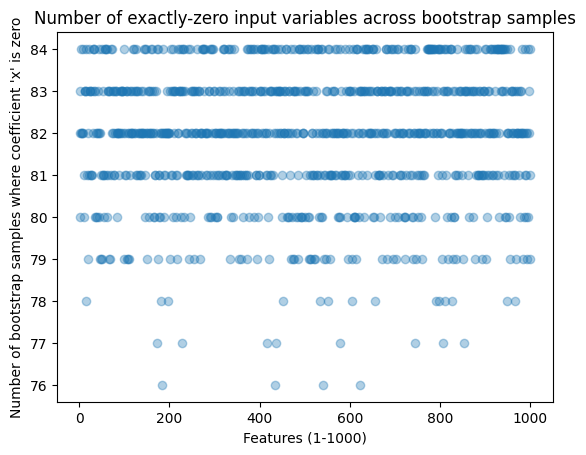

In [ ]:
# We're ready to plot
plt.style.use("default")
plt.scatter(x,y,alpha=0.35)
plt.gca().set(
    title="Number of exactly-zero input variables across bootstrap samples",
    xlabel="Features (1-1000)",
    ylabel="Number of bootstrap samples where coefficient 'x' is zero",
)
plt.show()

A great majority of input variables get zeroed out in 80 to 84 of our 100 bootstraps samples, with a handful of others being zeroed out in 76 to 79 bootstrap samples. 